In [ ]:
import pandas as pd
df = pd.read_csv(r"/NIFTY BANK.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")
df

Unnamed: 0      open      high       low     close  \
date                                                                            
2015-01-09 09:15:00+05:30           0  18845.90  18845.90  18801.70  18801.70   
2015-01-09 09:16:00+05:30           1  18801.70  18806.05  18790.20  18794.65   
2015-01-09 09:17:00+05:30           2  18796.00  18829.00  18794.65  18827.30   
2015-01-09 09:18:00+05:30           3  18827.30  18864.00  18827.30  18862.10   
2015-01-09 09:19:00+05:30           4  18862.10  18862.10  18843.55  18849.25   
...                               ...       ...       ...       ...       ...   
2016-05-06 14:43:00+05:30      121428  16287.30  16293.90  16286.30  16292.80   
2016-05-06 14:44:00+05:30      121429  16291.20  16291.60  16287.50  16289.00   
2016-05-06 14:45:00+05:30      121430  16289.00  16295.05  16288.55  16292.45   
2016-05-06 14:46:00+05:30      121431  16292.50  16297.55  16286.15  16287.25   
2016-05-06 14:47:00+05:30      121432  16286.35  16292.00       NaN       NaN   

                           volume  
date                               
2015-01-09 09:15:00+05:30     0.0  
2015-01-09 09:16:00+05:30     0.0  
2015-01-09 09:17:00+05:30     0.0  
2015-01-09 09:18:00+05:30     0.0  
2015-01-09 09:19:00+05:30     0.0  
...                           ...  
2016-05-06 14:43:00+05:30     0.0  
2016-05-06 14:44:00+05:30     0.0  
2016-05-06 14:45:00+05:30     0.0  
2016-05-06 14:46:00+05:30     0.0  
2016-05-06 14:47:00+05:30     NaN  

[121433 rows x 6 columns]

In [ ]:
newdf = df.resample('5Min').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last','volume':'sum'})
newdf



open      high       low     close  volume
date                                                                     
2015-01-09 09:15:00+05:30  18845.90  18864.00  18790.20  18849.25     0.0
2015-01-09 09:20:00+05:30  18849.25  18859.65  18829.80  18847.00     0.0
2015-01-09 09:25:00+05:30  18847.00  18850.15  18799.40  18815.15     0.0
2015-01-09 09:30:00+05:30  18815.15  18821.40  18772.90  18810.70     0.0
2015-01-09 09:35:00+05:30  18810.70  18811.95  18788.55  18800.05     0.0
...                             ...       ...       ...       ...     ...
2016-05-06 14:25:00+05:30  16288.60  16299.45  16282.00  16289.45     0.0
2016-05-06 14:30:00+05:30  16290.00  16295.85  16270.60  16287.35     0.0
2016-05-06 14:35:00+05:30  16287.65  16312.95  16282.35  16295.95     0.0
2016-05-06 14:40:00+05:30  16293.70  16299.20  16286.30  16289.00     0.0
2016-05-06 14:45:00+05:30  16289.00  16297.55  16286.15  16287.25     0.0

[139171 rows x 5 columns]

In [ ]:
from google.colab import files
newdf.to_csv('5minbnf.csv')
files.download('5minbnf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PLOT FOR OPEN COLUMN

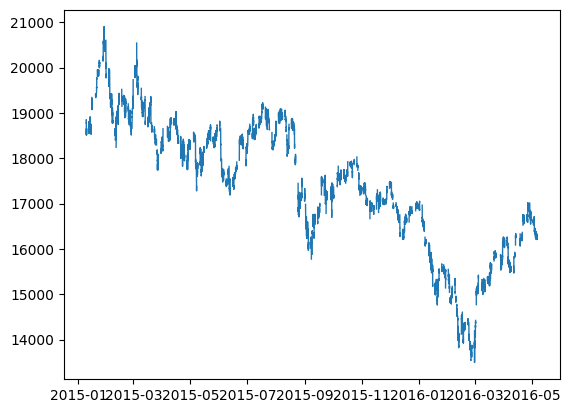

In [ ]:
import matplotlib.pyplot as plt
plt.plot(newdf.index,newdf.open,linewidth = 1)

# PLOT FOR HIGH COLUMN

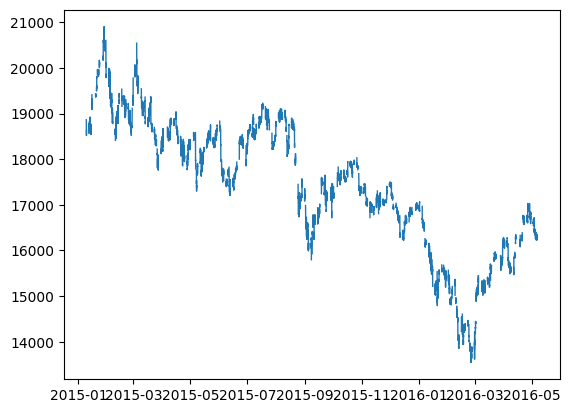

In [ ]:
import matplotlib.pyplot as plt
plt.plot(newdf.index,newdf.high,linewidth = 1)

# PLOT FOR LOW COLUMN

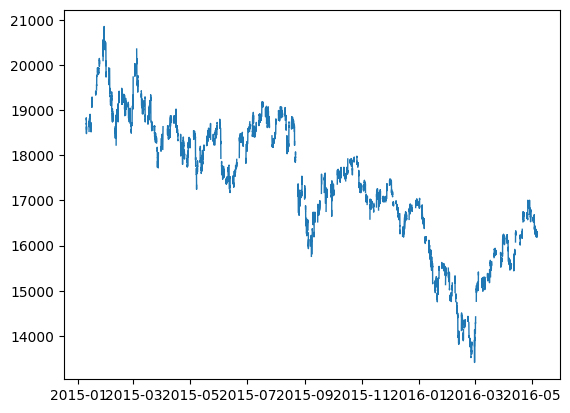

In [ ]:
import matplotlib.pyplot as plt
plt.plot(newdf.index,newdf.low,linewidth = 1)

# PLOT FOR CLOSE COLOMN

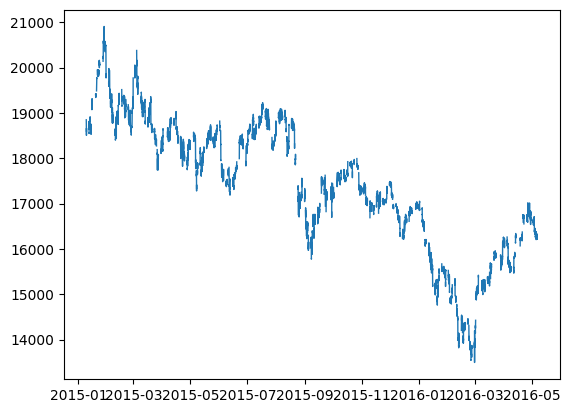

In [ ]:
import matplotlib.pyplot as plt
plt.plot(newdf.index,new  df.close,linewidth = 1)

# CANDLESTICK CHART FOR ABOVE *DATA*

In [ ]:
import plotly.graph_objects as go
fig =  go.Figure(data=[go.Candlestick(x=newdf.index,
                open=newdf['open'], high=newdf['high'],
                low=newdf['low'], close=newdf['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# SMA FOR 21DAYS

In [ ]:
sma_21 = pd.DataFrame()
sma_21["close"]= newdf["close"].rolling(window = 21).mean()
sma_21

close
date                                   
2015-01-09 09:15:00+05:30           NaN
2015-01-09 09:20:00+05:30           NaN
2015-01-09 09:25:00+05:30           NaN
2015-01-09 09:30:00+05:30           NaN
2015-01-09 09:35:00+05:30           NaN
...                                 ...
2016-05-06 14:25:00+05:30  16294.650000
2016-05-06 14:30:00+05:30  16294.295238
2016-05-06 14:35:00+05:30  16294.830952
2016-05-06 14:40:00+05:30  16294.964286
2016-05-06 14:45:00+05:30  16293.161905

[139171 rows x 1 columns]

#PLOT FOR 21DAYS SMA

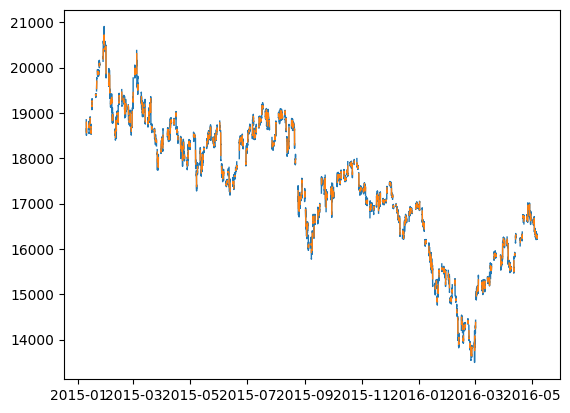

In [ ]:
plt.plot(newdf.index,newdf.close,sma_21,linewidth = 1)

# RSI FOR 10DAYS

date
2015-01-09 09:15:00+05:30          NaN
2015-01-09 09:20:00+05:30          NaN
2015-01-09 09:25:00+05:30          NaN
2015-01-09 09:30:00+05:30          NaN
2015-01-09 09:35:00+05:30          NaN
                               ...    
2016-05-06 14:25:00+05:30    43.893130
2016-05-06 14:30:00+05:30    41.153846
2016-05-06 14:35:00+05:30    53.859649
2016-05-06 14:40:00+05:30    57.634543
2016-05-06 14:45:00+05:30    61.033797
Freq: 5T, Name: close, Length: 139171, dtype: float64


<Axes: xlabel='date'>

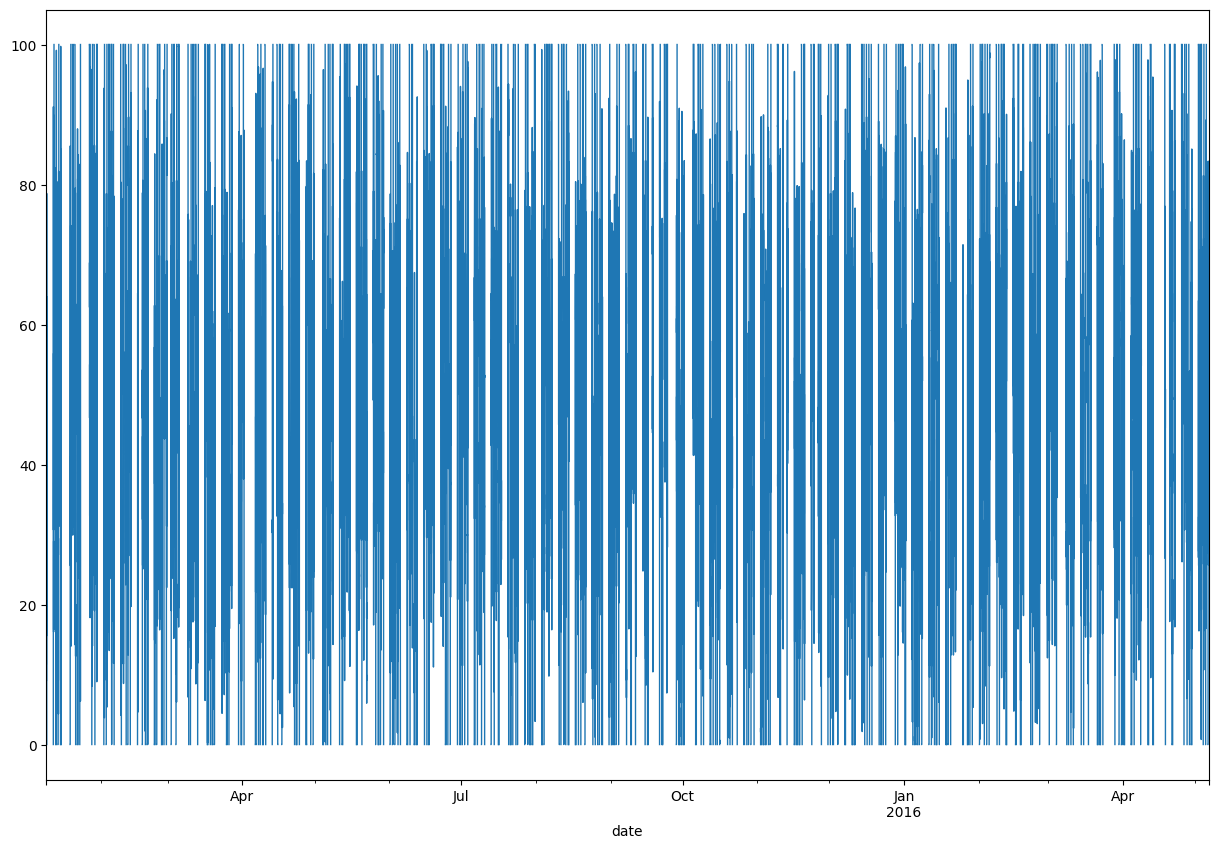

In [ ]:
import numpy as np

def rsi(data, period=10):
   gains = data["close"].diff().where(data["close"].diff() > 0, 0)
   losses = data["close"].diff().where(data["close"].diff() < 0, 0)
   average_gain = gains.rolling(period).mean()
   average_loss = losses.abs().rolling(period).mean()
   rsi = 100 - (100 / (1 + average_gain / average_loss))
   return rsi

rsi = rsi(newdf, period=10)
print(rsi)
# Plot the RSI.
rsi.plot(figsize=(15, 10),linewidth = 1)

In [ ]:
rsi_dataframe = pd.DataFrame(rsi)
rsi_dataframe

close
date                                
2015-01-09 09:15:00+05:30        NaN
2015-01-09 09:20:00+05:30        NaN
2015-01-09 09:25:00+05:30        NaN
2015-01-09 09:30:00+05:30        NaN
2015-01-09 09:35:00+05:30        NaN
...                              ...
2016-05-06 14:25:00+05:30  43.893130
2016-05-06 14:30:00+05:30  41.153846
2016-05-06 14:35:00+05:30  53.859649
2016-05-06 14:40:00+05:30  57.634543
2016-05-06 14:45:00+05:30  61.033797

[139171 rows x 1 columns]

In [ ]:
new_rsi = rsi_dataframe.assign(prev_clos = rsi_dataframe['close'].shift(1))
new_rsi

close  prev_clos
date                                           
2015-01-09 09:15:00+05:30        NaN        NaN
2015-01-09 09:20:00+05:30        NaN        NaN
2015-01-09 09:25:00+05:30        NaN        NaN
2015-01-09 09:30:00+05:30        NaN        NaN
2015-01-09 09:35:00+05:30        NaN        NaN
...                              ...        ...
2016-05-06 14:25:00+05:30  43.893130  52.580645
2016-05-06 14:30:00+05:30  41.153846  43.893130
2016-05-06 14:35:00+05:30  53.859649  41.153846
2016-05-06 14:40:00+05:30  57.634543  53.859649
2016-05-06 14:45:00+05:30  61.033797  57.634543

[139171 rows x 2 columns]

In [ ]:
new_rsi1 = new_rsi[new_rsi['close']<75][new_rsi['close']>25]
new_rsi1['prev_clos'].fillna(0,inplace = True)
new_rsi1


<ipython-input-102-cb9d198fcabb>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



close  prev_clos
date                                           
2015-01-09 10:00:00+05:30  31.404594   0.000000
2015-01-09 10:05:00+05:30  25.986842  31.404594
2015-01-09 10:10:00+05:30  25.958379  25.986842
2015-01-09 10:15:00+05:30  39.204545  25.958379
2015-01-09 10:20:00+05:30  46.198347  39.204545
...                              ...        ...
2016-05-06 14:25:00+05:30  43.893130  52.580645
2016-05-06 14:30:00+05:30  41.153846  43.893130
2016-05-06 14:35:00+05:30  53.859649  41.153846
2016-05-06 14:40:00+05:30  57.634543  53.859649
2016-05-06 14:45:00+05:30  61.033797  57.634543

[19817 rows x 2 columns]

In [ ]:
Date = new_rsi1.index.tolist()
Close = new_rsi1["close"].tolist()
Prev_close = new_rsi1["prev_clos"].tolist()

Dictionary = {}

for i in range(len(Date)):
  Dictionary[Date[i]] = (Close[i],Prev_close[i])

print(Dictionary)

{Timestamp('2015-01-09 10:00:00+0530', tz='pytz.FixedOffset(330)'): (31.404593639577328, 0.0), Timestamp('2015-01-09 10:05:00+0530', tz='pytz.FixedOffset(330)'): (25.986842105264046, 31.404593639577328), Timestamp('2015-01-09 10:10:00+0530', tz='pytz.FixedOffset(330)'): (25.958378970428456, 25.986842105264046), Timestamp('2015-01-09 10:15:00+0530', tz='pytz.FixedOffset(330)'): (39.20454545454561, 25.958378970428456), Timestamp('2015-01-09 10:20:00+0530', tz='pytz.FixedOffset(330)'): (46.19834710743783, 39.20454545454561), Timestamp('2015-01-09 10:25:00+0530', tz='pytz.FixedOffset(330)'): (51.318730442557296, 46.19834710743783), Timestamp('2015-01-09 10:30:00+0530', tz='pytz.FixedOffset(330)'): (57.92129162462179, 51.318730442557296), Timestamp('2015-01-09 10:35:00+0530', tz='pytz.FixedOffset(330)'): (54.14847161571979, 57.92129162462179), Timestamp('2015-01-09 10:40:00+0530', tz='pytz.FixedOffset(330)'): (42.9073342116813, 54.14847161571979), Timestamp('2015-01-09 10:45:00+0530', tz='p